## Mouse Event

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

events = [i for i in dir(cv2) if 'EVENT' in i]
print (events)

['EVENT_FLAG_ALTKEY', 'EVENT_FLAG_CTRLKEY', 'EVENT_FLAG_LBUTTON', 'EVENT_FLAG_MBUTTON', 'EVENT_FLAG_RBUTTON', 'EVENT_FLAG_SHIFTKEY', 'EVENT_LBUTTONDBLCLK', 'EVENT_LBUTTONDOWN', 'EVENT_LBUTTONUP', 'EVENT_MBUTTONDBLCLK', 'EVENT_MBUTTONDOWN', 'EVENT_MBUTTONUP', 'EVENT_MOUSEHWHEEL', 'EVENT_MOUSEMOVE', 'EVENT_MOUSEWHEEL', 'EVENT_RBUTTONDBLCLK', 'EVENT_RBUTTONDOWN', 'EVENT_RBUTTONUP']


### Simple circle

In [5]:
def draw_circle(event,x,y,flags,param):
    if event == cv2.EVENT_LBUTTONDOWN:
        cv2.circle(img,(x,y),20,(200,10,100),-1)


img = np.zeros((512,512,3), np.uint8)

cv2.namedWindow('image')
cv2.setMouseCallback('image',draw_circle)

while(1):
    cv2.imshow('image',img)
    if cv2.waitKey(1) & 0xFF == 27:
        break
cv2.destroyAllWindows()
    

### Like Paint

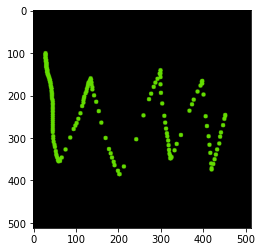

In [11]:
drawing = False

def brush(event,x,y,flags,param):
    global drawing
    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing == True:
            cv2.circle(img,(x,y),5,(0,220,100),-1)
    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
        
img = np.zeros((512,512,3), np.uint8)
cv2.namedWindow('image')
cv2.setMouseCallback('image',brush)

while True:
    cv2.imshow('image',img)
    if cv2.waitKey(1) & 0xFF == 27:
        break
cv2.destroyAllWindows()
plt.imshow(img[...,::-1])

### Changing the colors

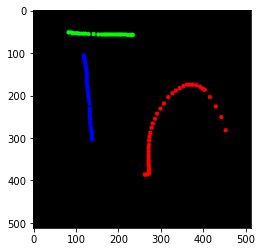

In [12]:
drawing = False 
color = (0,255,0)

def brush(event,x,y,flags,param):
    global drawing, color
    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing == True:
            cv2.circle(img,(x,y),5,color,-1)
    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
            
img = np.zeros((512,512,3), np.uint8)
cv2.namedWindow('image')
cv2.setMouseCallback('image',brush)

while True:
    cv2.imshow('image',img)
    k = cv2.waitKey(1) & 0xFF
    if k == ord('b'):
        color = (255,0,0)
    elif k==ord('g'):
        color = (0,255,0)
    elif k==ord('r'):
        color = (0,0,255)
    elif k == 27:
        break
cv2.destroyAllWindows()

plt.imshow(img[...,::-1])

### Draw Line

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


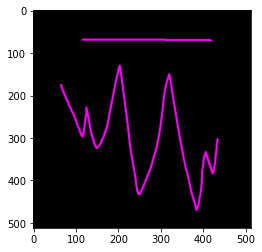

In [17]:
img = np.zeros((512,512,3))
drawing = False
ix = 0
iy = 0
def draw(event,x,y,flags,params):
    global ix,iy,drawing
    # Left Mouse Button Down Pressed
    if event==cv2.EVENT_LBUTTONDOWN:
        drawing = True
        ix = x
        iy = y
    if event==cv2.EVENT_MOUSEMOVE:
        if drawing==True:
            #For Drawing Line
            cv2.line(img,pt1=(ix,iy),pt2=(x,y),color=(255,0,255),thickness=3)
            ix = x
            iy = y
    if event==cv2.EVENT_LBUTTONUP:
        drawing = False

cv2.namedWindow("Window")
cv2.setMouseCallback("Window",draw)

while True:
    cv2.imshow("Window",img)
    if cv2.waitKey(1) & 0xFF ==27:
        break

cv2.destroyAllWindows()
plt.imshow(img[...,::-1])

### Rectangle

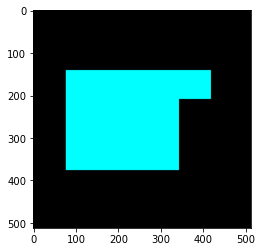

In [18]:
drawing = False 
start_point= (0,0)

def draw_rectangle(event,x,y,flags,param):
    global start_point, drawing
    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        start_point = x,y
    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing == True:
            cv2.rectangle(img,start_point,(x,y),(255,255,0),-1)

    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
        
img = np.zeros((512,512,3), np.uint8)
cv2.namedWindow('image')
cv2.setMouseCallback('image',draw_rectangle)

while True:
    cv2.imshow('image',img)
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break
cv2.destroyAllWindows()
plt.imshow(img[...,::-1])

### Beter Rectangle With Reseting

[[(854, 232), (788, 292)], [(624, 65), (318, 656)], [(191, 176), (23, 291)]]


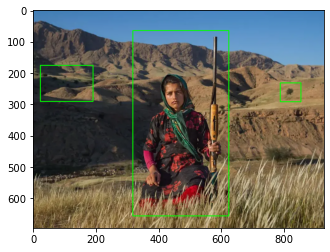

In [20]:
start_point = (0,0)
points = []
drawing = False

def draw_empty_rectangle(event, x, y, flags, param):
    global start_point, points, drawing

    if event == cv2.EVENT_LBUTTONDOWN:
        start_point = (x, y)

    elif event == cv2.EVENT_LBUTTONUP:

        points.append([start_point , (x, y)])

        cv2.rectangle(image, start_point, (x, y), (0, 255, 0), 2)
        cv2.imshow("image", image)

image = cv2.imread('images/girl.jpg')
clone = image.copy()
cv2.namedWindow("image")
cv2.setMouseCallback("image", draw_empty_rectangle)


while True:
    cv2.imshow("image", image)
    key = cv2.waitKey(1) & 0xFF

    # press 'r' to reset the window
    if key == ord("r"):
        image = clone.copy()
        points = []

    elif key == 27:
        break

cv2.destroyAllWindows() 

plt.imshow(image[...,::-1])
print(points)

### Showing the box

[[(318, 172), (549, 667)], [(614, 64), (560, 667)], [(878, 297), (732, 582)]]


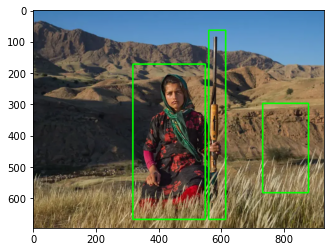

In [21]:
start_point = (0,0)
points = []
drawing= False

def annotate_image(event, x, y, flags, param):
    global start_point, points, drawing

    if event == cv2.EVENT_LBUTTONDOWN:
        start_point = (x, y)
        drawing = True 
    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing:
            temp_image = image.copy()
            cv2.rectangle(temp_image, start_point, (x, y), (120,255,0), 2)
            cv2.imshow("image", temp_image)
    elif event == cv2.EVENT_LBUTTONUP:

        points.append([start_point , (x, y)])

        cv2.rectangle(image, start_point, (x, y), (0, 255, 0), 3)
        cv2.imshow("image", image)
        drawing = False
        
image = cv2.imread('images/girl.jpg')
clone = image.copy()
temp_image = image.copy()
cv2.namedWindow("image")
cv2.setMouseCallback("image", annotate_image)

while True:
    if drawing == False:
        cv2.imshow("image", image)
    key = cv2.waitKey(5) & 0xFF

    if key == ord("r"):
        image = clone.copy()
        points = []

    elif key == 27:
        break

cv2.destroyAllWindows() 

plt.imshow(image[...,::-1])
print(points)

###  Undo

[[(252, 156), (580, 641)], [(859, 222), (773, 411)], [(650, 135), (682, 322)]]


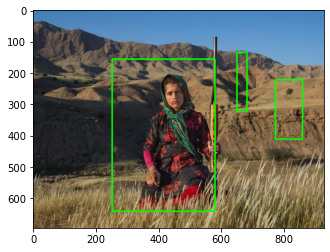

In [22]:
start_point = (0,0)
points = []
drawing= False

def annotate_image_with_undo(event, x, y, flags, param):
    global start_point, points, drawing

    if event == cv2.EVENT_LBUTTONDOWN:
        start_point = (x, y)
        drawing = True 
    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing:
            temp_image = image.copy()
            cv2.rectangle(temp_image, start_point, (x, y), (120,255,0), 2)
            cv2.imshow("image", temp_image)
    elif event == cv2.EVENT_LBUTTONUP:
        points.append([start_point , (x, y)])

        cv2.rectangle(image, start_point, (x, y), (0, 255, 0), 3)
        cv2.imshow("image", image)
        drawing = False

        
image = cv2.imread('images/girl.jpg')
clone = image.copy()
temp_image = image.copy()
cv2.namedWindow("image")
cv2.setMouseCallback("image", annotate_image_with_undo)

while True:
    if drawing == False:
        cv2.imshow("image", image)
    key = cv2.waitKey(5) & 0xFF

    if key == ord("r"):
        image = clone.copy()
        points = []
    # Undo    
    elif key == ord("z"): 
        image = clone.copy()
        points.pop()
        for p in points:
            cv2.rectangle(image, p[0], p[1], (0, 255, 0), 3)
    elif key == 27:
        break

cv2.destroyAllWindows() 

plt.imshow(image[...,::-1])
print(points)

Related tutorial on OpenCV.org: https://docs.opencv.org/4.6.0/db/d5b/tutorial_py_mouse_handling.html